# Probability Distribution

## Definition
A **Probability Distribution** describes how the probabilities are distributed over the values of a random variable. It shows the likelihood of each possible outcome in an experiment.

---

## Types of Probability Distribution

### 1. Discrete Probability Distribution
- Deals with **countable outcomes** (e.g., 0, 1, 2…).  
- Each outcome has an associated probability.  
- Example: Binomial, Poisson distributions.

### 2. Continuous Probability Distribution
- Deals with **uncountable outcomes** (e.g., any real number in a range).  
- Represented using a **probability density function (PDF)**.  
- Example: Normal, Uniform, Exponential distributions.


### Discrete Probability Distribution

**Definition:**  
A **Discrete Probability Distribution** A discrete probability distribution describes the probabilities of occurrence of all possible outcomes of a discrete random variable.
    - A discrete random variable (X) is a variable that can take on countable values, often integers (like 0, 1, 2,…).

    - The distribution tells us the likelihood of each possible value of X.
**Mathematical Definition:** If X is a discrete random variable taking values 𝑥1,𝑥2,…,𝑥𝑛with probabilities 𝑃(𝑋=𝑥𝑖)=𝑝𝑖P(X=x	​)=pi, then:
-       ∑n​pi​=1and0≤pi​≤1.

**Properties of Discrete Probability Distribution**
- 1. Non-negativity:
    - P(X=xi)≥0 for all 𝑖.
- 2. Normalization (Total Probability = 1):
    - ∑i​P(X=xi	)=1.
- 3. Probability Assignment:
    - Each outcome has a probability associated with it, representing the chance that the variable takes that value.
    
**Examples / Types:**  
- **Binomial Distribution**  
- **Poisson Distribution**  
- **Geometric Distribution**


# Binomial Distribution

**Definition**  
The **Binomial Distribution** models the number of successes $x$ (usually called "heads" or "success") in $N$ independent Bernoulli trials, each with success probability $\mu$.

**Special case**: When $N = 1$, it reduces to the **Bernoulli distribution**.

**Probability Mass Function (PMF)**

$$
P(X = x \mid N, \mu) = \binom{N}{x} \mu^x (1-\mu)^{N-x}
$$

where

$$
\binom{N}{x} = \frac{N!}{x!(N-x)!} \quad \text{for } x = 0,1,\dots,N
$$

and $\binom{N}{x} = 0$ otherwise.

**Moments**

- **Mean**:  
  $E[X] = N\mu$

- **Variance**:  
  $\text{Var}(X) = N\mu(1-\mu)$

---

# Bernoulli Distribution

**Definition**  
The **Bernoulli distribution** is a discrete probability distribution for a random variable $X$ that takes value **1** (success) with probability $\mu$ and value **0** (failure) with probability $1-\mu$.

It is the special case of the Binomial distribution when $N=1$.

**Probability Mass Function (PMF)**

$$
P(X = x \mid \mu) = \mu^x (1-\mu)^{1-x} \quad \text{for } x \in \{0,1\}
$$

**Equivalent piecewise form**

$$
P(X = x \mid \mu) =
\begin{cases} 
1 - \mu & \text{if } x = 0 \\
\mu       & \text{if } x = 1
\end{cases}
$$

**Moments**

- **Mean**:  
  $E[X] = \mu$

- **Variance**:  
  $\text{Var}(X) = \mu(1-\mu)$

# Bernoulli & Binomial Distributions in Python (scipy.stats)

We use `scipy.stats` — one of the most convenient and powerful libraries for working with probability distributions in Python.

## 1. Bernoulli Distribution

Single trial: success (1) with probability $p$, failure (0) with probability $1-p$.



In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

p = 0.3      

# Create distribution object
bern = stats.bernoulli(p=p)

# ──── Important methods ───────────────────────────────────────
print("PMF at x = 0 :", bern.pmf(0))          # P(X=0)
print("PMF at x = 1 :", bern.pmf(1))          # P(X=1)
print("Mean        :", bern.mean())           # = p
print("Variance    :", bern.var())            # = p(1-p)
print("Median      :", bern.median())
print("Entropy     :", bern.entropy())

# Generate random samples
np.random.seed(42)
samples = bern.rvs(size=20)
print("\n20 random Bernoulli samples:", samples)
print("Sample mean  :", samples.mean())       # should be ≈ p

PMF at x = 0 : 0.7000000000000002
PMF at x = 1 : 0.3
Mean        : 0.3
Variance    : 0.21
Median      : 0.0
Entropy     : 0.6108643020548935

20 random Bernoulli samples: [0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]
Sample mean  : 0.3


# Binomial Distribution
Number of successes in n independent Bernoulli trials, each with success probability p.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n = 20          
p = 0.3         

# Create distribution object
binom = stats.binom(n=n, p=p)


print(f"Mean        : {binom.mean():.3f}    (= n * p)")
print(f"Variance    : {binom.var():.3f}     (= n*p*(1-p))")
print(f"Std. dev.   : {binom.std():.3f}")
print(f"Skewness    : {binom.stats(moments='s'):.3f}")
print(f"Kurtosis    : {binom.stats(moments='k'):.3f}")

# Probability of exactly k successes
k_values = np.arange(0, n+1)
pmf = binom.pmf(k_values)

# Cumulative probability P(X ≤ k)
cdf = binom.cdf(k_values)

print(f"\nP(X =  5) = {binom.pmf(5):.5f}")
print(f"P(X ≤  5) = {binom.cdf(5):.5f}")
print(f"P(X ≥ 12) = {1 - binom.cdf(11):.5f}")

# Generate random samples
np.random.seed(42)
samples = binom.rvs(size=10_000)
print(f"\nSample mean of 10,000 draws : {samples.mean():.4f}  (should ≈ {n*p})")

Mean        : 6.000    (= n * p)
Variance    : 4.200     (= n*p*(1-p))
Std. dev.   : 2.049
Skewness    : 0.195
Kurtosis    : -0.062

P(X =  5) = 0.17886
P(X ≤  5) = 0.41637
P(X ≥ 12) = 0.00514

Sample mean of 10,000 draws : 5.9563  (should ≈ 6.0)


## Visualization – Binomial PMF + CDF

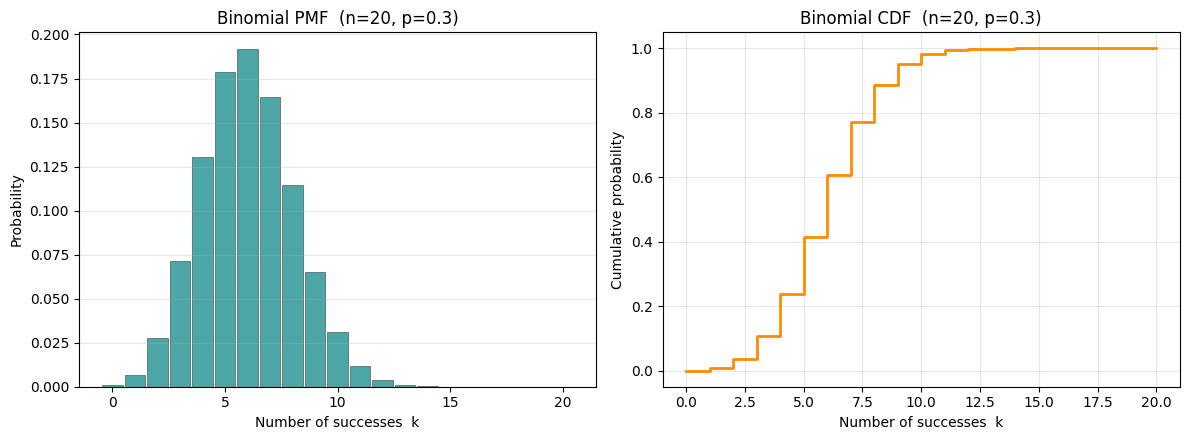

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# PMF
ax1.bar(k_values, pmf, width=0.9, color='teal', alpha=0.7, edgecolor='black', lw=0.4)
ax1.set_title(f'Binomial PMF  (n={n}, p={p})')
ax1.set_xlabel('Number of successes  k')
ax1.set_ylabel('Probability')
ax1.grid(True, axis='y', alpha=0.3)

# CDF
ax2.step(k_values, cdf, where='post', color='darkorange', lw=2)
ax2.set_title(f'Binomial CDF  (n={n}, p={p})')
ax2.set_xlabel('Number of successes  k')
ax2.set_ylabel('Cumulative probability')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()